In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data: How is the .csv organized?

For each .csv file the following apply:
* each row represents the data of a single vehicle
* the first 10 columns in the 1st row include the columns’ names
* the first 4 columns include information about the trajectory like the unique trackID, the type of vehicle, the distance traveled in meters and the average speed of the vehicle in km/h
* the last 6 columns are then repeated every 6 columns based on the time frequency. For example, column_5 contains the latitude of the vehicle at time column_10, and column­­­_11 contains the latitude of the vehicle at time column_16.
* Speed is in km/h, Longitudinal and Lateral Acceleration in m/sec2 and time in seconds.

In [4]:
# 1. lets blindly try to read the data into a dataframe

df = pd.read_csv("/home/addisu/Desktop/10 academy/data/raw_data.csv", sep=";")

ParserError: Error tokenizing data. C error: Expected 5831 fields in line 3, saw 5891


The error is caused by the fact that rows do **not** have equal number of columns. 

In [5]:
with open("/home/addisu/Desktop/10 academy/data/raw_data.csv", 'r') as file:
    lines = file.readlines()

In [6]:
print(f"The number of rows/lines is {len(lines)}")

The number of rows/lines is 1049


In [7]:
print(lines[0]) # column names
print(lines[0].strip('\n').strip().strip(';').split(';')) # columns names as a list

track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time

['track_id', ' type', ' traveled_d', ' avg_speed', ' lat', ' lon', ' speed', ' lon_acc', ' lat_acc', ' time']


In [8]:
lines_as_lists = [line.strip('\n').strip().strip(';').split(';') for line in lines]
len(lines_as_lists)

1049

In [9]:
print(f"the number of fields in row 1 is {len(lines_as_lists[1])}, row 2 is {len(lines_as_lists[2])}")

the number of fields in row 1 is 5830, row 2 is 5890


The number of fields in each row is = 4 + 6 * n

* The first 4 unique values are: track_id; type; traveled_d; avg_speed
* The remaining fields are repeated sequences of: 
  * lat_1; lon_1; speed_1; lon_acc_1; lat_acc_1; time_1
  * lat_2; lon_2; speed_2; lon_acc_2; lat_acc_2; time_2
  * ...
  * lat_n; lon_n; speed_n; lon_acc_n; lat_acc_n; time_n

* n depends on the time frequency. It is different for each row.


In [10]:
no_field_max = 0

for row in lines_as_lists:
    if len(row) > no_field_max:
        no_field_max = len(row)

print(f"the maximum number of fields is {no_field_max}")
largest_n = int((no_field_max-4)/6)
print(f"the largest n = {largest_n}")

the maximum number of fields is 134470
the largest n = 22411


We can divide each row into 2 parts:
1.  A list of the first 4 values. 
    - These will correspond to ['track_id', ' type', ' traveled_d', ' avg_speed']
2.  A matrix of size 6*n of the remaining values. 
    - These will correspond to a table with columns [' lat', ' lon', ' speed', ' lon_acc', ' lat_acc', ' time'] and n rows.
    - We will append the 'track_id' value to each row to keep track of the vehicle identity.

In [11]:
cols = lines_as_lists.pop(0)

In [12]:
track_cols = cols[:4]
trajectory_cols = ['track_id'] + cols[4:]

print(track_cols)
print(trajectory_cols)


['track_id', ' type', ' traveled_d', ' avg_speed']
['track_id', ' lat', ' lon', ' speed', ' lon_acc', ' lat_acc', ' time']


In [13]:
track_info = []
trajectory_info = []

for row in lines_as_lists:
    track_id = row[0]

    # add the first 4 values to track_info
    track_info.append(row[:4]) 

    remaining_values = row[4:]
    # reshape the list into a matrix and add track_id
    trajectory_matrix = [ [track_id] + remaining_values[i:i+6] for i in range(0,len(remaining_values),6)]
    # add the matrix rows to trajectory_info
    trajectory_info = trajectory_info + trajectory_matrix


In [14]:
df_track = pd.DataFrame(data= track_info,columns=track_cols)

df_track.head()

,track_id,type,traveled_d,avg_speed
0,1,Motorcycle,206.52,19.161652
1,2,Motorcycle,216.56,19.887953
2,3,Motorcycle,371.25,38.404959
3,4,Motorcycle,337.10,36.999238
4,5,Car,374.27,32.388897


In [17]:
df_trajectory = pd.DataFrame(data= trajectory_info,columns=trajectory_cols)

df_trajectory.head()

,track_id,lat,lon,speed,lon_acc,lat_acc,time
0,1,37.978745,23.736547,17.8644,0.0061,0.0815,0.000000
1,1,37.978744,23.736548,17.8647,-0.0015,0.0941,0.040000
2,1,37.978742,23.736550,17.8642,-0.0061,0.1067,0.080000
3,1,37.978741,23.736551,17.8630,-0.0108,0.1192,0.120000
4,1,37.978739,23.736553,17.8608,-0.0198,0.1317,0.160000


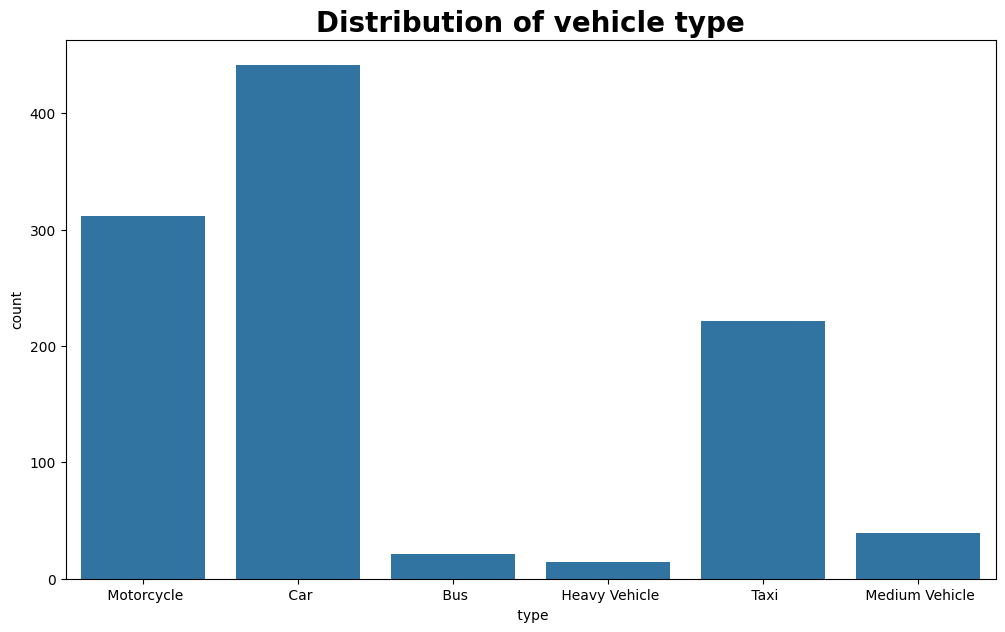

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df_track, x=" type")
plt.title(f'Distribution of vehicle type', size=20, fontweight='bold')
plt.show()